### **PROBLEM STATEMENT**

A renowned institute offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies.

Working as a data scientist with the analytics vertical of institute which focused on profiling the best companies and job positions to work for from the institute database. Provided with the information for a segment of learners, it is tasked to cluster the learners on the basis of their job profile, company, and other features. (Ideally, these clusters should have similar characteristics.)**

In [1]:
# IMPORTING NECESSARY LIABRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# READING THE FILE

df = pd.read_csv("scaler_clustering.csv")

In [3]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


Null Percentage

In [4]:
round(df.isna().sum()/len(df)*100,2)

Unnamed: 0           0.00
company_hash         0.02
email_hash           0.00
orgyear              0.04
ctc                  0.00
job_position        25.54
ctc_updated_year     0.00
dtype: float64

CHECKING DUPLICATED VALUES: (THERE IS NO DUPLICATED ROWS)

In [5]:
df[df.duplicated()]

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


#### TREATING THE COLUMNS FOR REMOVING SPECIAL CHARACTHERS

In [5]:
df['company_hash'] = df['company_hash'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
df['job_position'] = df['job_position'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)

#### REMOVING NAN
AS 'company_hash' and 'orgyear' comprises 0.02%, 0.04% respectively, therefore removing the nan values.

In [6]:
df = df.dropna(subset=['company_hash','orgyear'])

#### REMOVING UNWANTED COLUMNS
'Unnamed:0' is not necessary for our analysis, so removing it.

In [7]:
df = df.iloc[:,1:]

#### SETTING THE RIGHT DATATYPE

In [8]:
 df['ctc_updated_year'] = df['ctc_updated_year'].astype('int')
 df['orgyear'] = df['orgyear'].astype('int')

In [8]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008,220000,NaN,2019
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,NaN,2020
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021,700000,NaN,2021
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019,5100000,NaN,2019


In [9]:
def replace_nan_with_ctc_group_mode(dataframe):
    # Compute mode of 'job_position' for each 'ctc' group
    mode_mapping = dataframe.groupby('ctc')['job_position'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

    # Fill missing values in 'job_position' using mode_mapping
    df['job_position'] = dataframe['job_position'].fillna(df['ctc'].map(mode_mapping))

    return dataframe

In [10]:
replace_nan_with_ctc_group_mode(df)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008,220000,Other,2019
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,Backend Engineer,2020
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021,700000,Backend Engineer,2021
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019,5100000,Backend Engineer,2019


In [53]:
df['job_position'].isna().sum()/len(df) < 0.03

np.True_

In [39]:
# for remaining NaN values, we are deleting the rows.

round(df.isna().sum()/len(df)*100,2)

company_hash                 0.0
email_hash                   0.0
orgyear                      0.0
ctc                          0.0
job_position                 0.0
ctc_updated_year             0.0
YOE                          0.0
years_for_first_increment    0.0
avg_ctc                      0.0
avg_position_ctc             0.0
avg_company_ctc              0.0
ctc_level                    0.0
avg_ctc_flag                 0.0
avg_position_ctc_flag        0.0
avg_company_ctc_flag         0.0
dtype: float64

#### DROPPING THE REMAINING ROWS

In [11]:
df = df.dropna(subset=['job_position'])

In [11]:
round(df.isna().sum()/len(df)*100,2)

company_hash        0.0
email_hash          0.0
orgyear             0.0
ctc                 0.0
job_position        0.0
ctc_updated_year    0.0
dtype: float64

Correcting abnormality in 'orgyear' and 'ctc_updated_year'

In [12]:
defectyear_index =  df['orgyear'] > df['ctc_updated_year']
defectyear_index

0         False
1         False
2         False
3         False
4         False
          ...  
205838    False
205839    False
205840    False
205841    False
205842    False
Length: 205480, dtype: bool

In [13]:
df.loc[defectyear_index,['orgyear','ctc_updated_year']] = df.loc[defectyear_index,['ctc_updated_year','orgyear']].values

In [12]:
# Checking for abnormality again

df[df['orgyear'] > df['ctc_updated_year']]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


In [18]:
df['YOE'].unique

<bound method Series.unique of 0          4
1          1
2          5
3          2
4          2
          ..
205838    11
205839     3
205840     0
205841     0
205842     2
Name: YOE, Length: 205480, dtype: int64>

In [19]:
min(df['orgyear'])

0

In [20]:
df[df['orgyear']==0]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
13424,9xntwyzgrgsj,854ff163ded87211b944dfcaebdcf9e8efa45defc9582f...,0,700000,Backend Engineer,2021,2021
30335,avqn xzzgcvnxgz,d767ad3012a86dab37a38a106f65d00b85189fe49a3f0f...,0,220000,Other,2020,2020
32086,lxg,ae1b500192dcd0b6c2d5c69b51f6caf19c630640c0aeb1...,0,600000,Backend Engineer,2021,2021
33117,mvzp ge vbtqxwv,8ef16126bd9a4691801d2830156dc5528142a45d314593...,0,1200000,Backend Engineer,2021,2021
40553,mqvpto xzaxv rna,a0f794db04d5c13cae6f07c6ce9aee8ff731176cc4d4a1...,0,600000,Backend Engineer,2021,2021
56770,vngo ojzntr,536e217527d1101538c70b7001d7e28344dba87cd8e246...,0,400000,Backend Engineer,2021,2021
62717,wyvqstugxzn,a1da4f131e2efea24f6d64c66519724aa5c8c5c11a23d9...,0,1850000,FullStack Engineer,2019,2019
63629,bxznb xzw,5bbebf13d3b3edc497bc5e24d1ab540b66b3d9328d4948...,0,700000,FullStack Engineer,2019,2019
74313,ovbohzs trtwnqgzxwo,b9fac647e08fe47c6d112466c338e847e82e8f24e16236...,0,1000000,Backend Engineer,2021,2021
99408,wyvqstugxzn,a1da4f131e2efea24f6d64c66519724aa5c8c5c11a23d9...,0,1850000,Backend Engineer,2019,2019


In [95]:
df['orgyear']==0

0         False
1         False
2         False
3         False
4         False
          ...  
205838    False
205839    False
205840    False
205841    False
205842    False
Name: orgyear, Length: 205480, dtype: bool

C:\Users\SOURABH\AppData\Local\Temp\ipykernel_13740\246181577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['orgyear'])


<Axes: xlabel='orgyear', ylabel='Density'>

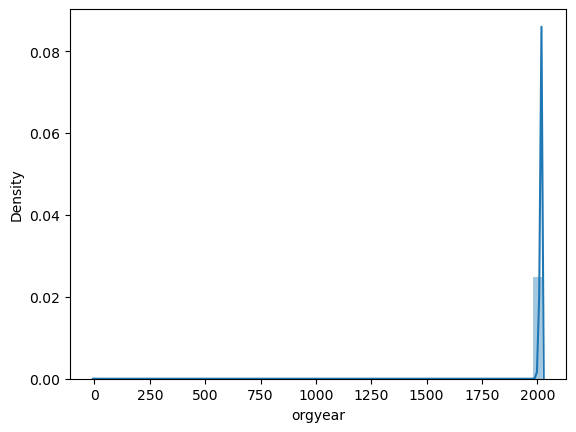

In [92]:
sns.distplot(df['orgyear'])

In [14]:
df.loc[df['orgyear']==0,['orgyear']] = df.loc[df['orgyear']==0,['ctc_updated_year']].values

C:\Users\SOURABH\AppData\Local\Temp\ipykernel_13740\246181577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['orgyear'])


<Axes: xlabel='orgyear', ylabel='Density'>

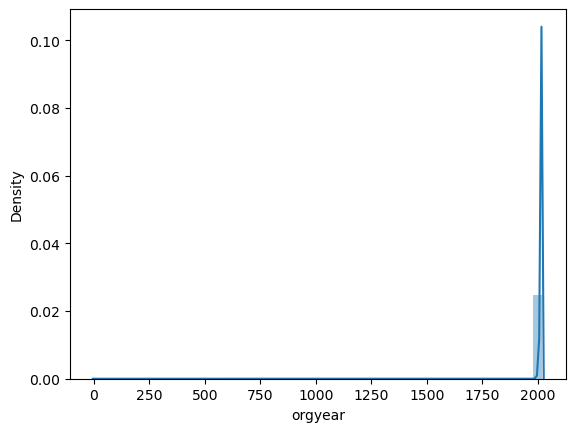

In [97]:
sns.distplot(df['orgyear'])

In [22]:
df[df['orgyear']==0]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE


In [14]:
max(df['ctc_updated_year']),min(df['ctc_updated_year'])

(20165, 2015)

In [15]:
max(df['orgyear']),min(df['orgyear'])

(2021, 1)

In [16]:
df[df['ctc_updated_year'] == 20165]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
183768,ftxzcton,4007e5caadc3f52c3e18bf2b4eacbadf17b114208c2d04...,2019,1560000,Backend Engineer,20165
203992,xatv ouvqp ogrhnxgzo ucn rna,7191da2e57dcb0c1301711e889ea72d5cc801e039359b1...,2019,850000,Backend Engineer,20165


In [13]:
# to show numeric value instead scientific notation.

pd.options.display.float_format = '{:,.0f}'.format

In [13]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205480.000000,2.054800e+05,205480.000000
mean,2014.812901,2.244692e+06,2019.865403
std,22.442211,1.147827e+07,56.627215
min,1.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,2021.000000,2.000000e+08,20165.000000


In [15]:
df.loc[(df['ctc_updated_year'] <= 1900) | (df['ctc_updated_year'] > 2024), 'ctc_updated_year'] = np.nan

# Fill NaNs with the mean 'ctc_updated_year' per 'job_position'
df['ctc_updated_year'] = df.groupby('job_position')['ctc_updated_year'].transform(lambda x: x.fillna(x.mean()))

C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\4281580409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ctc_updated_year'] = df.groupby('job_position')['ctc_updated_year'].transform(lambda x: x.fillna(x.mean()))


In [16]:
df.loc[(df['orgyear'] <= 1900) | (df['orgyear'] > 2024), 'orgyear'] = np.nan

# Fill NaNs with the mean 'ctc_updated_year' per 'job_position'
df['orgyear'] = df.groupby('job_position')['orgyear'].transform(lambda x: x.fillna(x.mean()))

C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\1751233660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orgyear'] = df.groupby('job_position')['orgyear'].transform(lambda x: x.fillna(x.mean()))


In [16]:
df[df['ctc_updated_year'] == 20165]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


#### SETTING THE CORRECT DATATYPE

In [17]:
df['ctc'] = df.loc[:,'ctc'].astype('int')
df['orgyear'] = df.loc[:,'orgyear'].astype('int')
df['ctc_updated_year'] = df.loc[:,'ctc_updated_year'].astype('int')

C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\112308458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ctc'] = df.loc[:,'ctc'].astype('int')
C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\112308458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orgyear'] = df.loc[:,'orgyear'].astype('int')
C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\112308458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [19]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,"205,480","205,480","205,480"
mean,"2,015","2,244,692","2,020"
std,4,"11,478,272",1
min,"1,970",2,"2,015"
25%,"2,013","530,000","2,019"
50%,"2,016","950,000","2,020"
75%,"2,018","1,700,000","2,021"
max,"2,021","200,000,000","2,024"


In [19]:
df[df['ctc_updated_year']<df['orgyear']] 

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
2211,phrxkv,3394674bb6bb1de6289e931853fa0bd131c811e0054a92...,2020,1500000,Backend Engineer,2019
3651,wgszxkvzn,2cc6bae4e52677d27ce3fca38d7a01ecbe537e1dc1c48d...,2021,600000,Backend Engineer,2019
10076,xzegojo,4c171381270155fb87b885f89cd71ca37ebbb8fd9da58b...,2020,360000,Other,2019
11081,exqon vacvznvst uqxcvnt rxbxnta,d6df76c2b61fa3a068e4e3812be12a58f86f78a31fe888...,2020,310000,Other,2019
19920,zgn vuurxwvmrt vwwghzn,6aa38b497c73367a7dd6eafb95bdd5b07cca83ed14c588...,2021,500000,Backend Engineer,2019
19937,zgn vuurxwvmrt vwwghzn,6aa38b497c73367a7dd6eafb95bdd5b07cca83ed14c588...,2021,500000,Engineering Leadership,2019
20290,xzegojo,4c171381270155fb87b885f89cd71ca37ebbb8fd9da58b...,2020,360000,Other,2019
23576,fyj ag jgh ztta nyxo,af3f2d5aff40c73774a6f2a9f36502fbe298ebdc7834e4...,2021,199800000,Other,2019
24763,oxq,8b82635f6d131631b1c1e1dad46d104d6e4573f9be77bd...,2021,1210000,Backend Engineer,2019
32240,mrvwpmhwp,f648fa217922f5a36b510df6346a2041a3483e21289069...,2021,1200000,Backend Engineer,2019


In [18]:
df.loc[df['ctc_updated_year']<df['orgyear'],['orgyear','ctc_updated_year']] = df.loc[df['ctc_updated_year']<df['orgyear'],['ctc_updated_year','orgyear']].values

In [18]:
df[df['ctc_updated_year']<df['orgyear']]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


**Creating a new feature 'YOE' by assuming current year is '2025'.**

In [19]:
current_year = 2025
df['YOE'] = current_year - df['orgyear']
df['years_for_first_increment'] = df.loc[:,'ctc_updated_year'] - df.loc[:,'orgyear']

C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\1145196744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YOE'] = current_year - df['orgyear']
C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\1145196744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_for_first_increment'] = df.loc[:,'ctc_updated_year'] - df.loc[:,'orgyear']


In [23]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,years_for_first_increment
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,9,4
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,7,1
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,10,5
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,8,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,8,2
...,...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008,220000,Other,2019,17,11
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,Backend Engineer,2020,8,3
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021,700000,Backend Engineer,2021,4,0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019,5100000,Backend Engineer,2019,6,0


In [22]:
df.describe()

,orgyear,ctc,ctc_updated_year,YOE,years_for_first_increment
count,"205,480","205,480","205,480","205,480","205,480"
mean,"2,015","2,244,692","2,020",10,5
std,4,"11,478,272",1,4,4
min,"1,970",2,"2,015",4,0
25%,"2,013","530,000","2,019",7,2
50%,"2,016","950,000","2,020",9,4
75%,"2,018","1,700,000","2,021",12,6
max,"2,021","200,000,000","2,024",55,51


In [20]:
df['YOE'] = df.loc[:,'YOE'].astype('int')
df['years_for_first_increment'] = df.loc[:,'years_for_first_increment'].astype('int')

C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\1443877039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YOE'] = df.loc[:,'YOE'].astype('int')
C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9764\1443877039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_for_first_increment'] = df.loc[:,'years_for_first_increment'].astype('int')


#### The dataframe is now clean with no NaN values, duplicated values, wrong data type or any abnormality.

In [27]:
# sample dataset for streamlit. no feature engineering

# df.to_csv('sample_dataset.csv')
# df.loc[:,['job_position', 'orgyear', 'ctc', 'ctc_updated_year']].to_csv('sample_dataset.csv')

#### FEATURE ENGINEERING

In [29]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,years_for_first_increment
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,9,4
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,7,1
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,10,5
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,8,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,8,2
...,...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008,220000,Other,2019,17,11
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,Backend Engineer,2020,8,3
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021,700000,Backend Engineer,2021,4,0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019,5100000,Backend Engineer,2019,6,0


In [30]:
job_avg_ctc = df.groupby(['job_position'])['ctc'].mean().reset_index(name = 'avg_ctc')                     # calculating the avg by just job_position
avg_yoe_position = df.groupby(['job_position','YOE'])['ctc'].mean().reset_index(name = 'avg_position_ctc') # calculating the avg by job_position and YOE
avg_yoe_company = df.groupby(['company_hash','YOE'])['ctc'].mean().reset_index(name = 'avg_company_ctc')   # calculating the avg by company_hash and YOE

In [32]:
job_avg_ctc

,job_position,avg_ctc
0,,650000.0
1,SDE 2,1200000.0
2,7,445000.0
3,7033771951,100000000.0
4,737,350000.0
...,...,...
999,student,1715000.0
1000,support escalation engineer,2000000.0
1001,system engineer,500000.0
1002,system software engineer,610000.0


In [33]:
df = pd.merge(df,job_avg_ctc,on=['job_position'],how='left')              # merging the avg by just job_position
df = pd.merge(df,avg_yoe_position,on=['job_position','YOE'],how='left')   # merging the avg by job_position and YOE
df = pd.merge(df,avg_yoe_company,on=['company_hash','YOE'],how='left')    # merging the avg by company_hash and YOE

In [35]:
# Creating 'ctc_level' to analyse at what level their ctc's are.
# below are the mapping code.


ctc_level_code = [
    df['ctc'] < 500000,                     # Below 500,000 → Level 1
    (df['ctc'] >= 500000) & (df['ctc'] <= 1000000),  # Between 500,000 and 1,000,000 → Level 2
    (df['ctc'] > 1000000) & (df['ctc'] <= 1700000)]   # Between 10,00,000 and 17,00,000 → Level 3 ELSE Level 4.

choices = [1, 2, 3]



df['ctc_level'] = np.select(ctc_level_code, choices, default=4)

In [37]:
df['avg_ctc_flag'] = df.apply(lambda x: 1 if x['ctc'] > x['avg_ctc'] else (2 if x['ctc'] == x['avg_ctc'] else 3), axis=1)
df['avg_position_ctc_flag'] = df.apply(lambda x: 1 if x['ctc'] > x['avg_position_ctc'] else (2 if x['ctc'] == x['avg_position_ctc'] else 3), axis=1)
df['avg_company_ctc_flag'] = df.apply(lambda x: 1 if x['ctc'] > x['avg_company_ctc'] else (2 if x['ctc'] == x['avg_company_ctc'] else 3), axis=1)

In [38]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,avg_company_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag,avg_company_ctc_flag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,9,4,4.331403e+06,4.968215e+06,1.100000e+06,3,3,3,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,7,1,1.860817e+06,1.383867e+06,7.486393e+05,1,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,10,5,1.644692e+06,1.594742e+06,2.000000e+06,4,1,1,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,8,2,1.644692e+06,1.390891e+06,1.401765e+06,2,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,8,2,1.860817e+06,1.471489e+06,1.400000e+06,3,3,3,2


### ANALYSIS WITH 'PROFILE REPORT'

In [ ]:
# installling 'ydata-profiling' for more analysis

# ! pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
report = ProfileReport(df)
report.to_notebook_iframe()

### **DEEP ANALYSIS**
#### 1. TOP 10 JOB_POSITION BY AVG CTC

In [26]:
df.groupby('job_position')['ctc'].mean().sort_values(ascending=False).head(10)

job_position
Telar                   100000000.0
Data entry              100000000.0
7033771951              100000000.0
Business Man            100000000.0
Computer Scientist 2    100000000.0
Jharkhand               100000000.0
Reseller                100000000.0
Seleceman                99900000.0
Safety officer           99900000.0
Driver                   95000000.0
Name: ctc, dtype: float64

#### 2. Top 10 employees (earning more than most of the employees in the company)

In [27]:
df[df['ctc']>df['avg_company_ctc']].sort_values(by='ctc',ascending=False).head(10)['email_hash']

18724     b114758a5c36d4ae7242b09e365c0ab00f5f7d6fb5eb20...
18863     f1b31a501f6b7fd6edae9e7e883bf60d2d3bff0fa37368...
125764    42b16d7825c41cc884176f81a8642e781a658fd9b677da...
86137     9a21414cdaa55bd8fae0eca911ccb3ab2a132be8f4e74d...
119896    431c610cffb5f699476173431bb1f47a51bcc680407e44...
51553     2744c7f42fd4d492fa66cb2ba5168921c444dc8611ffa2...
19548     88161382f67450f5b727195c98e779619654ef1a186c43...
78862     9b0725defc38f67d8f440b2edbb87b6ce03fb5cfc137c9...
78890     71d7605911c92225343efc7e8aa1a81b60b5ed81796318...
78823     27ee35ce0f4e1ce38f0c342b17f987727261dfef452767...
Name: email_hash, dtype: object

#### 3. Top 10 employees of data science in each company earning more than their peers

In [28]:
ds = df[df['job_position'].str.contains(r'Data Scientist',case=False,na=False)]

In [29]:
ds[ds['ctc']>ds['avg_position_ctc']].sort_values(by='ctc',ascending=False).head(10)['email_hash']

31244     bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...
52734     268a5aa92f0b6d0c675fc9cc1e300eb0c5930a3a139a23...
834       cda8d723438e81185d2ee8c348870a4612eea974cdb2db...
2681      72ed7ced98573f71c8f95bc8b75aac4f0677e8872c6bec...
45145     ace1152ca60b6f2c62bb7c4a00bca0afd5a9bb2c297267...
36733     a1223067ab5c4ff7fcf39ed4c053057f06090a57fc05ba...
1732      ee8dd42d6ea8365909147d861c7978d19f727a8075ba96...
151281    6ad86d120e39db485331f9a0b2b1f15ce2a7bdaee778ab...
13487     e7722fb701c61e5cad82c39ee8bf3debe160d429b72c64...
10294     2e1d492bc09bfe0d4cc9757a9c63a296c1527af1c8ecc8...
Name: email_hash, dtype: object

#### 4. Bottom 10 employees of data science in each company earning less than their peers

In [30]:
ds[ds['ctc']<ds['avg_position_ctc']].sort_values(by='ctc',ascending=True).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,avg_company_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag,avg_company_ctc_flag
10809,srgmvrtast xzntrrxstzwt ge nyxzso,8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...,2017,4000,Data Scientist,2019,8,2,2.028234e+06,1.739210e+06,2.544000e+05,1,3,3,3
193859,otjch xzw,585f7e9865dcdcaad7edf10909d796ba2c5210cde3530b...,2017,4000,Data Scientist,2018,8,1,2.028234e+06,1.739210e+06,4.000000e+03,1,3,3,2
8686,bxyhu wgbbhzxwvnxgz,690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...,2018,4000,Data Scientist,2019,7,1,2.028234e+06,1.211593e+06,3.270000e+05,1,3,3,3
168084,nvrrtq ntwyzgrgsxto,05801a432a038c254972e356598ca6aa139a18c31d6611...,2020,4000,Data Scientist,2021,5,1,2.028234e+06,4.132122e+06,4.000000e+03,1,3,3,2
50951,onhatzn,bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...,2019,6000,Data Scientist,2021,6,2,2.028234e+06,2.131693e+06,3.518244e+06,1,3,3,3
136771,ovbohzs trtwnqg btwyvzxwo,e374eea75640881206a21894f69190138c2c0535277dc1...,2017,7000,Data Scientist,2019,8,2,2.028234e+06,1.739210e+06,2.880000e+05,1,3,3,3
24062,exznqhon ogrhnxgzo ucn rna,ab2dc9db23c3104f0b6b3dbd4cdd5bfb9e5829b8b7943d...,2017,7200,Data Scientist,2019,8,2,2.028234e+06,1.739210e+06,9.066667e+03,1,3,3,3
182943,dvcgq,287dd26e9357888e0ba2c7482764131f7bbcb1748a4f56...,2019,7250,Data Scientist,2020,6,1,2.028234e+06,2.131693e+06,7.250000e+03,1,3,3,2
9383,nvnv wgzohrnvzwj otqcxwto,3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...,2020,7500,Data Scientist,2020,5,0,2.028234e+06,4.132122e+06,1.471675e+06,1,3,3,3
92521,wtxuvr wgqu,0dcbef1fe34438edbb39b52451378ea61ac2b84a56d919...,2017,7500,Data Scientist,2019,8,2,2.028234e+06,1.739210e+06,7.500000e+03,1,3,3,2


In [31]:
ds[ds['ctc']<ds['avg_position_ctc']].sort_values(by='ctc',ascending=True).head(10)['email_hash']

10809     8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...
193859    585f7e9865dcdcaad7edf10909d796ba2c5210cde3530b...
8686      690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...
168084    05801a432a038c254972e356598ca6aa139a18c31d6611...
50951     bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...
136771    e374eea75640881206a21894f69190138c2c0535277dc1...
24062     ab2dc9db23c3104f0b6b3dbd4cdd5bfb9e5829b8b7943d...
182943    287dd26e9357888e0ba2c7482764131f7bbcb1748a4f56...
9383      3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...
92521     0dcbef1fe34438edbb39b52451378ea61ac2b84a56d919...
Name: email_hash, dtype: object

#### 5. Bottom 10 employees (earning less than most of the employees in the company)

In [32]:
df[df['ctc']<df['avg_company_ctc']].sort_values(by='ctc',ascending=True).head(10)['email_hash']

135239    3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...
150467    9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...
99279     b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...
170946    80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...
84725     fdd4a762ae373cfa10fa2bf6dc995c8ed540160b834d0a...
179051    7c8e0d8194db4deb41cbc9b3b6c428e0f9ab289436638e...
61895     1694233be08738b7b50bdb7649b792f0ab8a514c01bec9...
49197     fdd4a762ae373cfa10fa2bf6dc995c8ed540160b834d0a...
147591    299f764fcae62f331f3c5eb1b451e7107302ded46e2a71...
106873    d9476096e4e5d6f0b0f6079b0543145f62b43c82478bbc...
Name: email_hash, dtype: object

#### 6. Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers

In [33]:
exp_df =   df[(df['YOE']==5) | (df['YOE']==6) |(df['YOE']==7)]
filtered_exp_df = exp_df[exp_df['ctc']<exp_df['avg_position_ctc']] 

In [34]:
filtered_exp_df['rank'] = filtered_exp_df.groupby(['company_hash', 'job_position'])['ctc'].rank(method='dense',ascending=False)

C:\Users\SOURABH\AppData\Local\Temp\ipykernel_9404\1623698944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_exp_df['rank'] = filtered_exp_df.groupby(['company_hash', 'job_position'])['ctc'].rank(method='dense',ascending=False)


In [35]:
filtered_exp_df[filtered_exp_df['rank']<10][['company_hash','email_hash','rank']].sort_values(by=['company_hash','rank'])

,company_hash,email_hash,rank
2933,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,1.0
16792,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,1.0
97122,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,1.0
139664,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,1.0
163724,1 axsxnvro,70459269ec53bd863dc3bad03772c608842ce6182710e1...,1.0
...,...,...,...
69957,zxztrtvuo,af742fa47c46fa167ddfaf9c22a12a31cff23717582daa...,6.0
180448,zxztrtvuo,fac585bc5df553349fc1fa7dcd4dbe468f1018d6e58996...,7.0
12248,zxztrtvuo,f09524b67053af24c9e446c0dd4d861cf053470ceaf0c9...,8.0
172988,zxztrtvuo,73ed57fdb578ccb723d176b1624bb29b0e840e89ab4230...,9.0


#### 7. Top 10 companies (based on their CTC)

In [36]:
df.groupby('company_hash')['ctc'].mean().reset_index().sort_values(by='ctc',ascending=False).head(10)

,company_hash,ctc
13373,ntwyzguvqp xnqvxnk xn ogrhnxgz,200000000.0
18946,pyxcqvl vhngbgmxrto,200000000.0
13322,ntwyzg xzaxv sqghu,200000000.0
15758,onttr onqxuo fyttro rxbxnta,200000000.0
7915,gutznti wgzohrnvzno ucn rna,200000000.0
384,aggovz mgmwvn xzaxv uqxcvnt rxbxnta,200000000.0
32040,wxqwhxnqgxd,200000000.0
2390,bjnqvy tztqsj xzaxv ucn rna,200000000.0
1896,bgax uqgltwn rxbxnta,200000000.0
28819,vuytrxgz ogenfvqto ucn rna,200000000.0


#### 8. Top 2 positions in every company (based on their CTC)

In [37]:
df.groupby(['company_hash','job_position'])['ctc'].mean().reset_index().sort_values(by=['company_hash','ctc'],ascending=[True,False])

,company_hash,job_position,ctc
0,0,Backend Engineer,100000.0
1,0,Other,100000.0
2,0000,Other,300000.0
4,01 ojztqsj,Frontend Engineer,830000.0
3,01 ojztqsj,Android Engineer,270000.0
...,...,...,...
67311,zz,Backend Engineer,500000.0
67313,zzb ztdnstz vacxogqj ucn rna,Backend Engineer,600000.0
67314,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.0
67315,zzgato,Backend Engineer,130000.0


In [25]:
ctc_level_count =  df['ctc_level'].value_counts()

<BarContainer object of 4 artists>

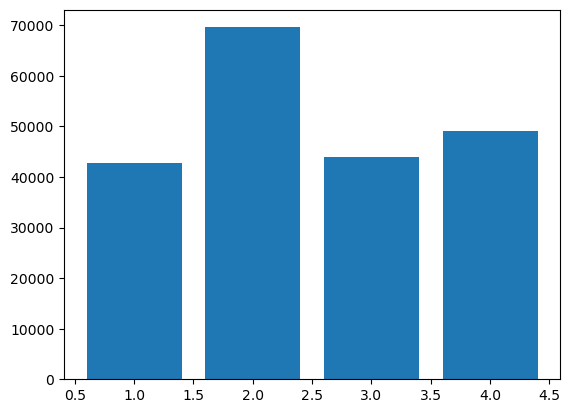

In [26]:
plt.bar(ctc_level_count.index, ctc_level_count.values)

**- WE CAN CLEARLY SEE THAT COUNT OF PEOPLE EARNING BETWEEN (500000 - 1000000) IS MORE THAN THE OTHERS.**

In [191]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,avg_company_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag,avg_company_ctc_flag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,9,4,4.331403e+06,4.968215e+06,1.100000e+06,3,3,3,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,7,1,1.860817e+06,1.383867e+06,7.486393e+05,1,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,10,5,1.644692e+06,1.594742e+06,2.000000e+06,4,1,1,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,8,2,1.644692e+06,1.390891e+06,1.401765e+06,2,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,8,2,1.860817e+06,1.471489e+06,1.400000e+06,3,3,3,2


#### SELECTING THE COLUMNS FOR CLUSTERING

In [144]:
# without 'avg_company_ctc' and 'avg_company_ctc_flag'
new_df = ['ctc','YOE','years_for_first_increment','avg_ctc','avg_position_ctc','ctc_level','avg_ctc_flag','avg_position_ctc_flag']

In [145]:
X = df[new_df]

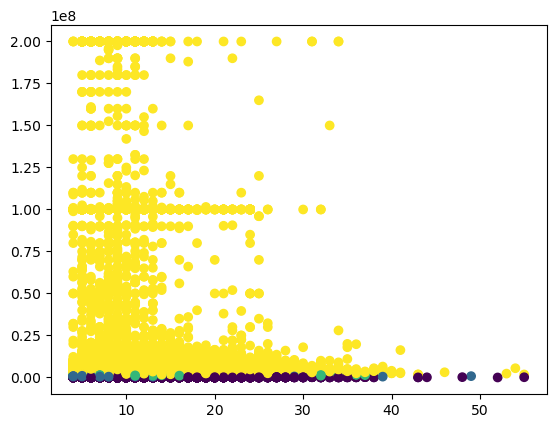

In [27]:
plt.scatter(x=X['YOE'],y=X['ctc'],c= df['ctc_level'] )

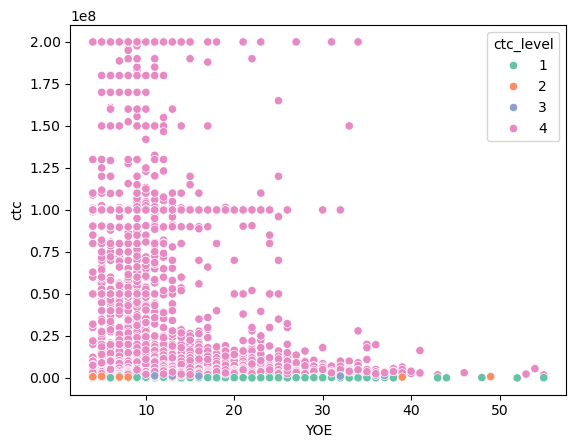

In [44]:
sns.scatterplot(data = df, x='YOE', y='ctc', hue='ctc_level',palette='Set2')
plt.show()

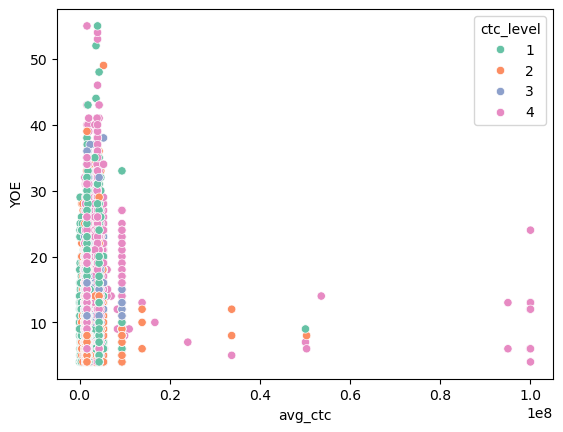

In [45]:
sns.scatterplot(data = df, x='avg_ctc', y='YOE', hue='ctc_level',palette='Set2')
plt.show()

In [26]:
X

,ctc,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag
0,1100000,9,4,4.331403e+06,4.968215e+06,3,3,3
1,449999,7,1,1.860817e+06,1.383867e+06,1,3,3
2,2000000,10,5,1.644692e+06,1.594742e+06,4,1,1
3,700000,8,2,1.644692e+06,1.390891e+06,2,3,3
4,1400000,8,2,1.860817e+06,1.471489e+06,3,3,3
...,...,...,...,...,...,...,...,...
205475,220000,17,11,4.331403e+06,4.500742e+06,1,3,3
205476,500000,8,3,1.644692e+06,1.390891e+06,2,3,3
205477,700000,4,0,1.644692e+06,1.628897e+06,2,3,3
205478,5100000,6,0,1.644692e+06,1.253029e+06,4,1,1


In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [147]:
 X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

In [148]:
X_scaled

,ctc,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag
0,0.00550,0.098039,0.078431,0.043295,0.048699,0.666667,1.0,1.0
1,0.00225,0.058824,0.019608,0.018589,0.013558,0.000000,1.0,1.0
2,0.01000,0.117647,0.098039,0.016427,0.015625,1.000000,0.0,0.0
3,0.00350,0.078431,0.039216,0.016427,0.013627,0.333333,1.0,1.0
4,0.00700,0.078431,0.039216,0.018589,0.014417,0.666667,1.0,1.0
...,...,...,...,...,...,...,...,...
205475,0.00110,0.254902,0.215686,0.043295,0.044116,0.000000,1.0,1.0
205476,0.00250,0.078431,0.058824,0.016427,0.013627,0.333333,1.0,1.0
205477,0.00350,0.000000,0.000000,0.016427,0.015960,0.333333,1.0,1.0
205478,0.02550,0.039216,0.000000,0.016427,0.012275,1.000000,0.0,0.0


In [46]:
df[df.duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,avg_company_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag,avg_company_ctc_flag
881,wgszxkvzn,632b4147b511a2835bc2a8a9bf7f5b3792a9350a24f887...,2020,350000,Other,2020,5,0,4.331403e+06,4.125778e+06,1.071767e+06,1,3,3,3
1510,xqatng,994458a1bb855172b48c598e8d1c16e2e57c53cef209cc...,2017,850000,Backend Engineer,2020,8,3,1.644692e+06,1.390891e+06,7.100000e+05,2,3,3,1
1687,wgszxkvzn,5ddf3b544555cdb872adade8ab5bf81a8c52835e327aee...,2015,1000000,Backend Engineer,2021,10,6,1.644692e+06,1.594742e+06,1.753220e+06,2,3,3,3
1695,ntwy bvyxzaqv,e738753a982c2977b6c3fabf842dc2aa703f48db0b9113...,2020,360000,Other,2022,5,2,4.331403e+06,4.125778e+06,1.095847e+07,1,3,3,3
1758,voxvz uvxzno,353939e49dea622f59434db0e591aa126fe545a12576be...,2018,300000,Other,2020,7,2,4.331403e+06,2.986323e+06,4.360000e+05,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204964,vbagwo,30aca42fcbf43f26e631675fd47846f77d60bc9fd78945...,2015,1960000,Backend Engineer,2021,10,6,1.644692e+06,1.594742e+06,8.522250e+05,4,1,1,1
204974,oxtbtzo,95341b9a643c7f1f5bc1e084882e5ed8b0700fc2526d70...,2010,1980000,Backend Engineer,2021,15,11,1.644692e+06,2.229721e+06,1.710000e+06,4,1,3,1
205264,xmb,4b608bdee9ba68fbe3846d8828e6485bd33981c425e0c3...,2014,1800000,Backend Engineer,2020,11,6,1.644692e+06,1.885904e+06,1.131991e+06,4,1,3,1
205315,ntowg,2efb710c0296b195e030d6388847fa35c4c5ddd3b72b10...,2020,1600000,Backend Engineer,2021,5,1,1.644692e+06,1.438784e+06,1.600000e+06,3,3,1,2


In [149]:
# DUE TO MERGING, SOME DATA HAS BEEN DUPLICATED. SO REMOVING THE DUPLICATED DATA

df.drop_duplicates(keep='first', inplace=True, ignore_index=False)
X_scaled.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [33]:
X_scaled.isnull().sum()

ctc                          0
YOE                          0
years_for_first_increment    0
avg_ctc                      0
avg_position_ctc             0
avg_company_ctc              0
ctc_level                    0
avg_ctc_flag                 0
avg_position_ctc_flag        0
avg_company_ctc_flag         0
dtype: int64

### **LOCAL OUTLIER FACTOR TREATMENT**

In [150]:
from sklearn.neighbors import LocalOutlierFactor

In [151]:
lof = LocalOutlierFactor(n_neighbors=30, contamination=0.05, metric='euclidean')
X_scaled['lof_score'] = lof.fit_predict(X_scaled)
X_scaled['lof_anomaly_score'] = lof.negative_outlier_factor_

In [152]:
# FILTERING OUT THE ANOMALIES

X_scaled = X_scaled[X_scaled['lof_score'] == 1]

In [153]:
# REMOVING 'LOF SCORE'

X_scaled = X_scaled.iloc[:,:-2]

In [155]:
np.shape(X_scaled)

(66200, 8)

#### HOPKINS STATISTICS
#### The Hopkins statistic is a measure that determines how well a dataset is suited for clustering.
#### CloseR to 1 → Data is highly clusterable and vice for 0.

In [156]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    X=X.values #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures

    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size ,X.shape[1])) #a random sample of size sample_size from the original data X
    
    
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [157]:
hopkins_statistic(X_scaled)

np.float64(0.998488522835691)

In [33]:
l = [] #list to hold values for each call
for i in range(5):
    H=hopkins_statistic(X_scaled)
    l.append(H)
print(np.mean(l))

0.9982504535328252


- FROM THE SCORE WE CAN CONFIRM THAT DATA CAN BE CLUSTERED.

### **ELBOW METHOD**

In [158]:
from sklearn.cluster import KMeans

In [159]:
#Using the KMeans inertia and Elbow Method

min_num_of_clusters = 2
max_num_of_clusters = 15
kmeans_per_k = [KMeans(n_clusters=k, random_state=42,init='k-means++',algorithm='lloyd').fit(X_scaled) for k in range(min_num_of_clusters, max_num_of_clusters+1)]

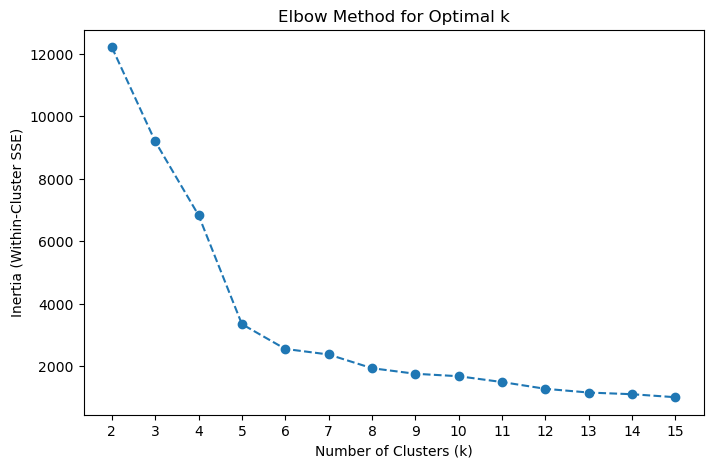

In [160]:
inertia_values = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 5))
plt.plot(range(min_num_of_clusters, max_num_of_clusters + 1), inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.xticks(np.arange(2,max_num_of_clusters+1))
plt.title("Elbow Method for Optimal k")
plt.show()

- FROM ELBOW METHOD, IT'S SEEN K='5' SHOULD BE THE OPTIMUM VALUE.

### **HIERARCHICAL CLUSTERING (DENDOGRAM)**

In [161]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx- n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [162]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

X_scaled_sample = X_scaled.sample(25000)
X_sample = X.iloc[X_scaled_sample.index]
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled_sample)

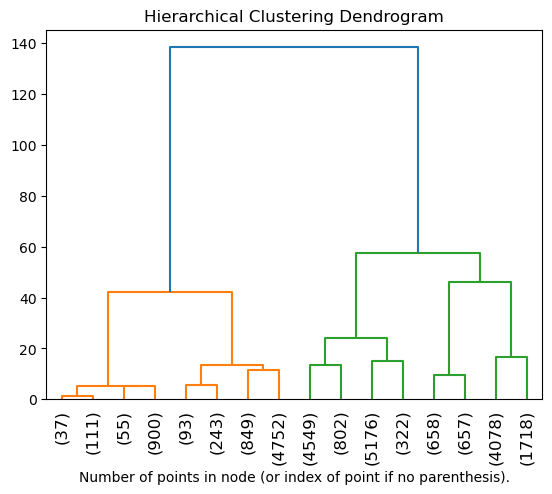

In [163]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=90)
plt.show()

- FROM THE DENDOGRAMS, WE CAN SEE 5 CLUSTER IS OPTIMUM FOR CLUSTERING.

#### **USING DAVIES BOULDIN SCORE TEST FOR OPTIMUM K-VALUE**

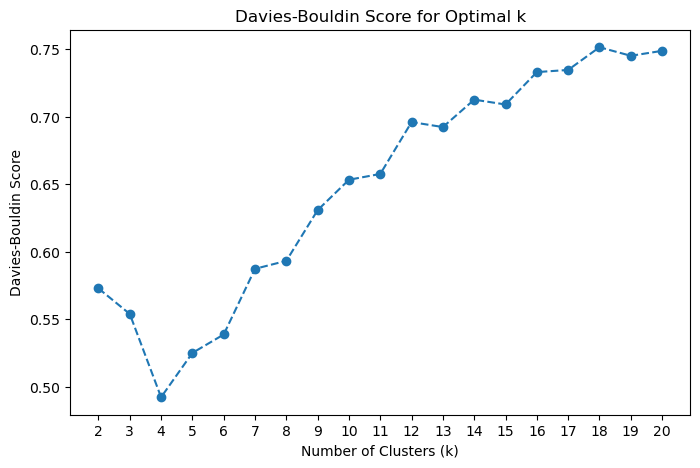

In [164]:
from sklearn.metrics import  davies_bouldin_score

davies_bouldin_scores = []
k_values = np.arange(2,21)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = davies_bouldin_score(X_scaled, labels)
    davies_bouldin_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.title("Davies-Bouldin Score for Optimal k")
plt.xticks(k_values)
plt.show()


#### LOWER THE SCORE, THE BETTER IT IS.
- FROM Davies-Bouldin PLOT, VALUE OF K = '4' SEEMS OPTIMUM.

### **SILHOUETTE SCORE**

In [60]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Change '5' to your optimal K
labels = kmeans.fit_predict(X_scaled)  # X_scaled is your normalized dataset


Silhouette Score: 0.4350


#### *silhouette_score for FULL DATASET*

In [ ]:
#Using the silhouette_score
from sklearn.metrics import silhouette_score

# Define range of clusters
min_num_of_clusters = 2
max_num_of_clusters = 10

# Store silhouette scores
silhouette_scores = []

# Loop through different k values
for k in range(min_num_of_clusters, max_num_of_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)  # Cluster labels for k clusters
    
    score = silhouette_score(X_scaled, labels)  # Compute silhouette score
    silhouette_scores.append(score)

In [ ]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(min_num_of_clusters, max_num_of_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.show()

#### *silhouette_score for SAMPLE DATASET*

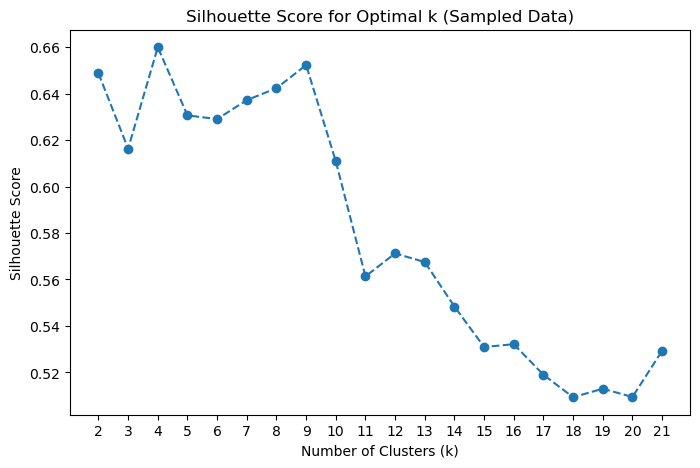

In [74]:
# silhouette_score for samples
from sklearn.metrics import silhouette_score

# Define range of clusters
min_num_of_clusters = 2
max_num_of_clusters = 21
silhouette_scores = []
k_values = list(range(min_num_of_clusters, max_num_of_clusters + 1))

subset_size = min(15000, len(X_scaled))  
subset_indices = np.random.choice(len(X_scaled), subset_size, replace=False)  # Sample indices
X_sample = X_scaled.iloc[subset_indices]  # Extract subset

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)  # Fit on full dataset
    labels_sample = kmeans.labels_[subset_indices]  # Get labels for the subset
    score = silhouette_score(X_sample, labels_sample)  # Compute silhouette score on subset
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k (Sampled Data)")
plt.xticks(k_values)
plt.show()


#### HIGHER THE SCORE, BETTER THE RESULT
- FROM THE SILHOUETTE SCORE, IT SEEMS K = 4 IS OPTIMUM.

### **K-Means**
#### Applying final K-means

In [182]:
# Defining the best k value
# FROM ALL ABOVE METHOD IT IS SEEN THAT POINT 6 IS OPTIMUM FOR 'K' VALUE.
final_k = 4 

# Train KMeans model
kmeans = KMeans(n_clusters=final_k, random_state=42)
final_labels = kmeans.fit_predict(X_scaled)  # Cluster labels for each data point

# Add cluster labels to your original dataframe
X_scaled["Cluster"] = final_labels

### Analyzing the Clusters

<Axes: xlabel='Cluster'>

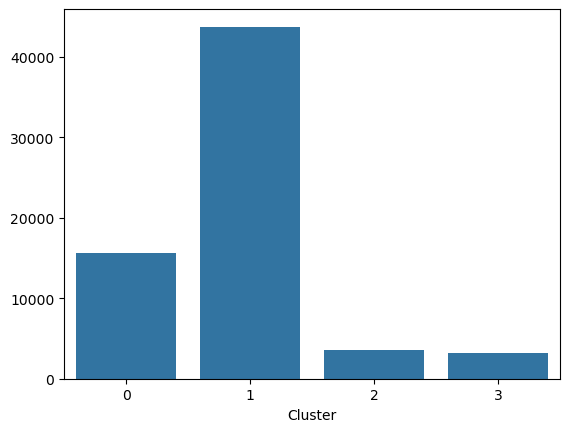

In [188]:
sns.barplot(x =X_scaled["Cluster"].value_counts().index ,y = X_scaled["Cluster"].value_counts().values)

In [184]:
# CHECKING CLUSTER STATISTICS

round(X_scaled.groupby("Cluster").mean(),3)

,ctc,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag
Cluster,,,,,,,,
0,0.052,0.161,0.129,0.021,0.021,0.988,0.000,0.000
1,0.004,0.140,0.105,0.025,0.026,0.377,0.996,0.993
2,0.010,0.156,0.126,0.026,0.016,0.799,0.987,0.029
3,0.012,0.222,0.185,0.019,0.031,0.941,0.024,0.936


#### - CLUSTER 0 HAS THE HIGHER AVERAGE CTC WHILE CLUSTER 1 HAS THE LOWEST AVERAGE CTC. (CAN BE VERIFIED FROM 'CTC_LEVEL')

#### *CHECKING DISTRIBUTIONS*

C:\Users\SOURABH\anaconda3\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


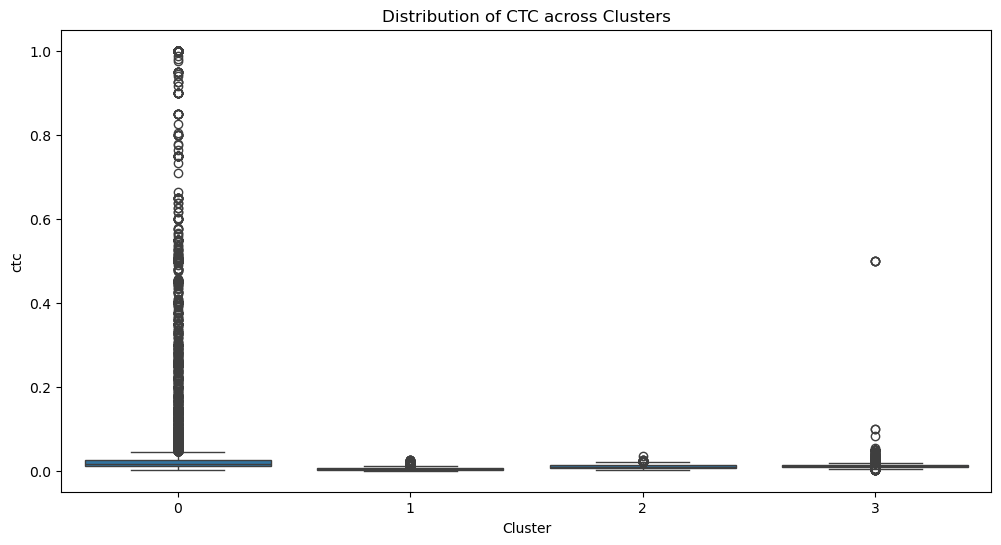

In [185]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cluster", y="ctc", data=X_scaled)  # Change 'ctc' to other features
plt.title("Distribution of CTC across Clusters")
plt.show()

C:\Users\SOURABH\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SOURABH\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SOURABH\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


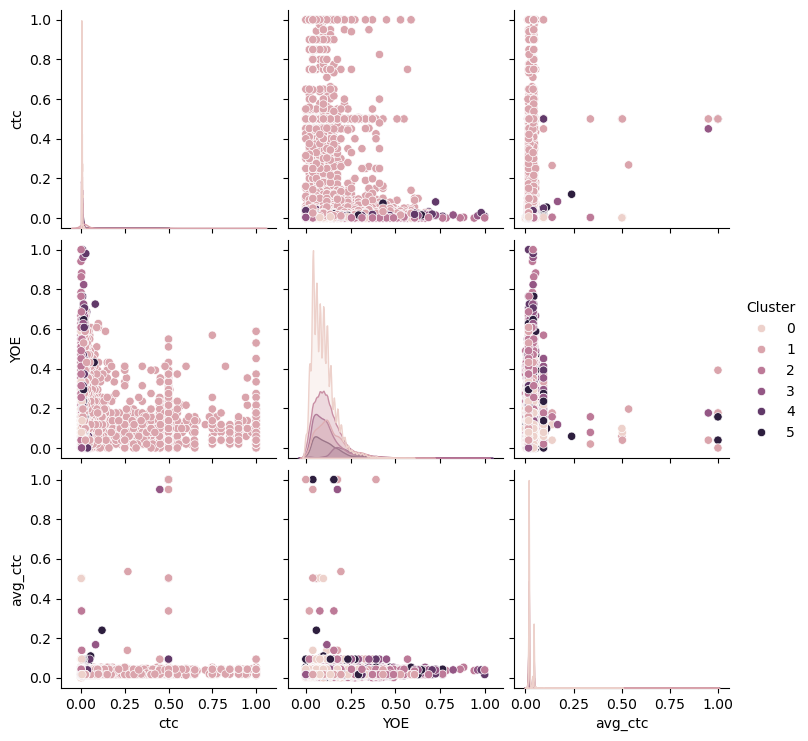

In [69]:
sns.pairplot(X_scaled, hue="Cluster", vars=["ctc", "YOE", "avg_ctc"])  # Select key features
plt.show()

#### *NAMING THE LABELS*

In [65]:
cluster_labels = {
    0: "Low_earner",
    1: "Higher_earner",
    2: "Optimum_earner",
    3: "Good_earner"}


X_scaled["Cluster_Label"] = X_scaled["Cluster"].map(cluster_labels)

In [66]:
X_scaled.groupby('Cluster_Label')['ctc'].mean()

Cluster_Label
Good_earner       0.026710
Higher_earner     0.041594
Low_earner        0.003811
Optimum_earner    0.005252
Name: ctc, dtype: float64

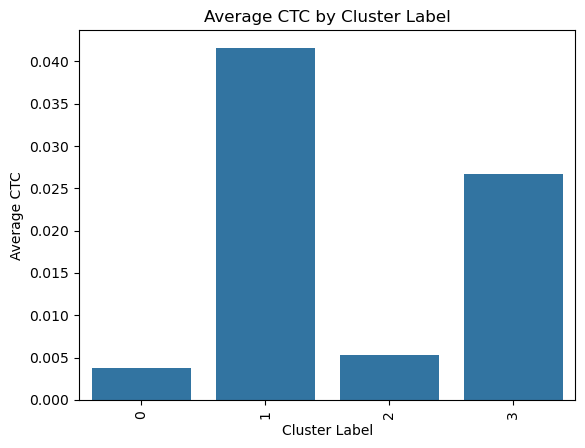

In [51]:
sns.barplot(x=X_scaled.groupby('Cluster')['ctc'].mean().index, y=X_scaled.groupby('Cluster')['ctc'].mean().values)
plt.xlabel("Cluster Label")
plt.ylabel("Average CTC")
plt.title("Average CTC by Cluster Label")
plt.xticks(rotation=90)
plt.show()

#### *WE CAN SEE COUNT OF 'LOW EARNER' AS CLUSTERED IS VERY HIGH THAN THE OTHERS.*

### **PCA**

In [80]:
X_selected_scaled = X_scaled.iloc[:,:-1]

In [166]:
from sklearn.decomposition import PCA

#### FINDING BEST 'n_components'.

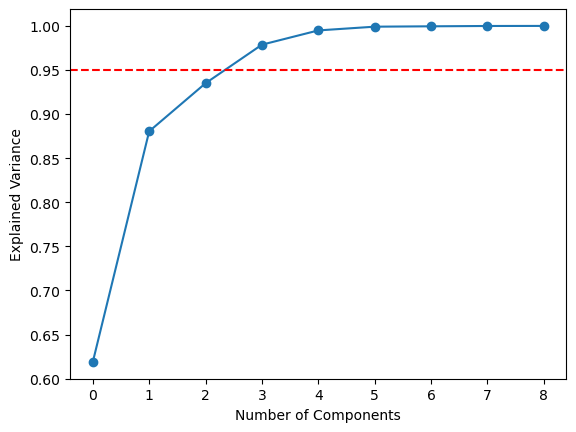

In [83]:
pca = PCA().fit(X_selected_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.axhline(y=0.95, color="r", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.show()

- FROM ABOVE IT CAN BE SEEN 'n_components' SHOULD BE 2.

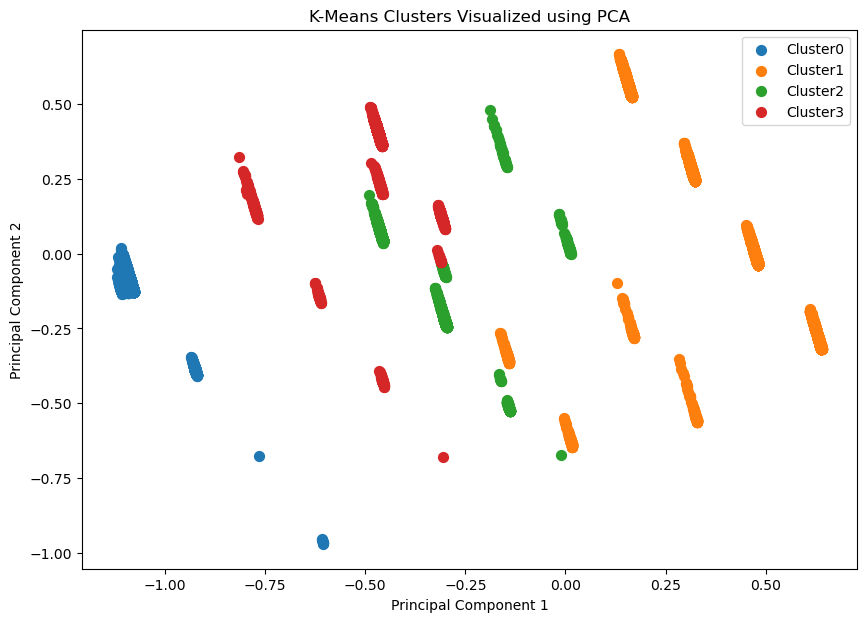

In [84]:
# USING PCA

final_k = 4 # from kmeans

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_selected_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = kmeans.labels_
# Plot the clusters

plt.figure(figsize=(10, 7))
for cluster in range(final_k):
  clustered_data = df_pca[df_pca['cluster'] == cluster]
  plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster{cluster}', s=50)


plt.title('K-Means Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### **UMAP**

In [53]:
# ! pip install umap-learn

from umap import UMAP

C:\Users\SOURABH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SOURABH\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


NameError: name 'n_neighbors' is not defined

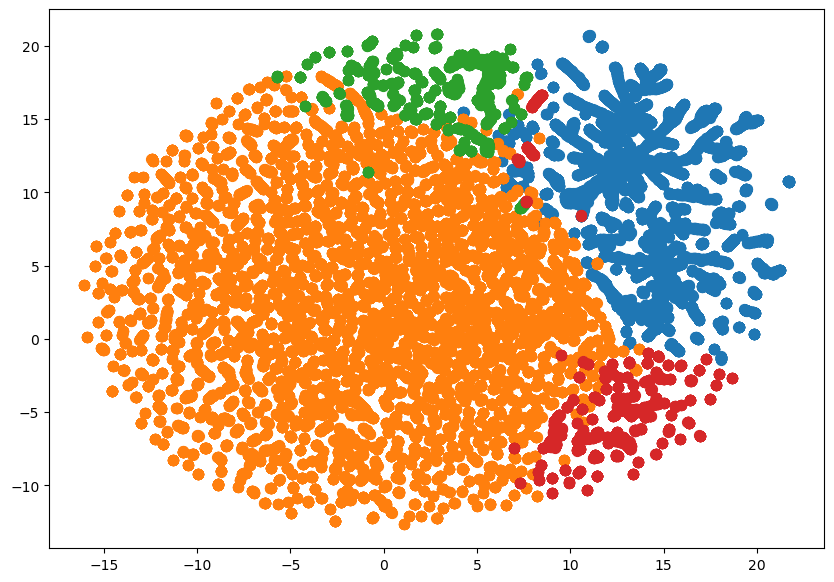

In [85]:
#Using UMAP
final_k = 4 # from kmeans


# Perform UMAP to reduce to 2 components
umap_reducer = UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
umap_components = umap_reducer.fit_transform(X_selected_scaled)
# Create a DataFrame with the UMAP components and cluster labels
df_umap = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
df_umap['cluster'] = kmeans.labels_



# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(final_k):
  clustered_data = df_umap[df_umap['cluster'] == cluster]
  plt.scatter(clustered_data['UMAP1'], clustered_data['UMAP2'], label=f'Cluster{cluster}', s=50)



plt.title('K-Means Clusters Visualized using UMAP with n_neighbors = 15 and min_dist = 0.1')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()

C:\Users\SOURABH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SOURABH\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


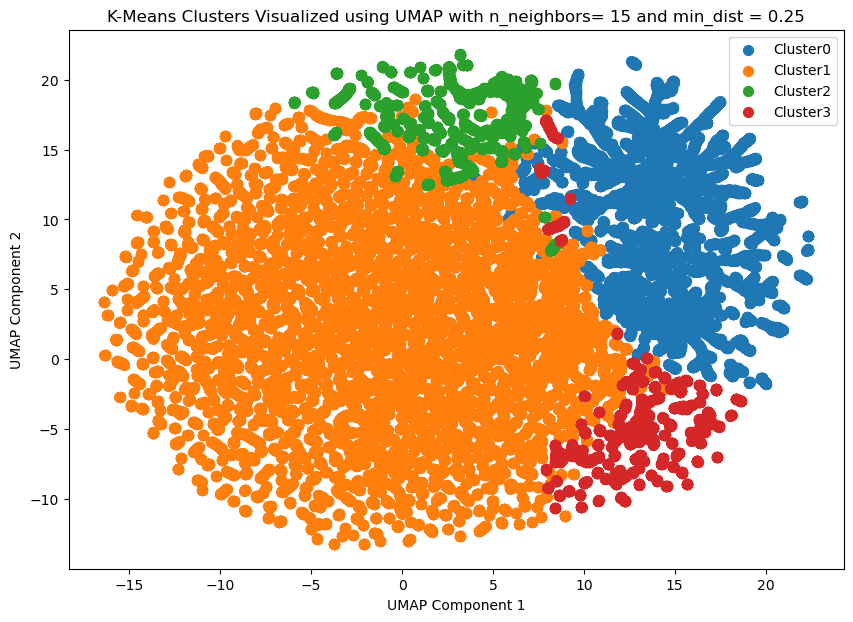

In [86]:
from umap import UMAP

#Using UMAP
final_k = 4 # from kmeans

# Perform UMAP to reduce to 2 components
umap_reducer = UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.25)
umap_components = umap_reducer.fit_transform(X_selected_scaled)
# Create a DataFrame with the UMAP components and cluster labels
df_umap = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
df_umap['cluster'] = kmeans.labels_



# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(final_k):
  clustered_data = df_umap[df_umap['cluster'] == cluster]
  plt.scatter(clustered_data['UMAP1'], clustered_data['UMAP2'], label=f'Cluster{cluster}', s=50)



plt.title('K-Means Clusters Visualized using UMAP with n_neighbors= 15 and min_dist = 0.25')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()

In [ ]:
from umap import UMAP

#Using UMAP
final_k = 4 # from kmeans

# Perform UMAP to reduce to 2 components
umap_reducer = UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
umap_components = umap_reducer.fit_transform(df_pca.iloc[:,:-1])
# Create a DataFrame with the UMAP components and cluster labels
df_umap = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
df_umap['cluster'] = kmeans.labels_



# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(final_k):
  clustered_data = df_umap[df_umap['cluster'] == cluster]
  plt.scatter(clustered_data['UMAP1'], clustered_data['UMAP2'], label=f'Cluster{cluster}', s=50)



plt.title('K-Means Clusters Visualized using UMAP with n_neighbors = 15 and min_dist = 0.1')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()

### **DBSCAN**
#### Finding the Best 'eps' (Neighborhood Size)

In [167]:
X_scaled.head()

,ctc,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag
0,0.00550,0.098039,0.078431,0.043295,0.048699,0.666667,1.0,1.0
1,0.00225,0.058824,0.019608,0.018589,0.013558,0.000000,1.0,1.0
2,0.01000,0.117647,0.098039,0.016427,0.015625,1.000000,0.0,0.0
3,0.00350,0.078431,0.039216,0.016427,0.013627,0.333333,1.0,1.0
4,0.00700,0.078431,0.039216,0.018589,0.014417,0.666667,1.0,1.0


In [107]:
X_scaled = X_scaled.iloc[:,:-1]

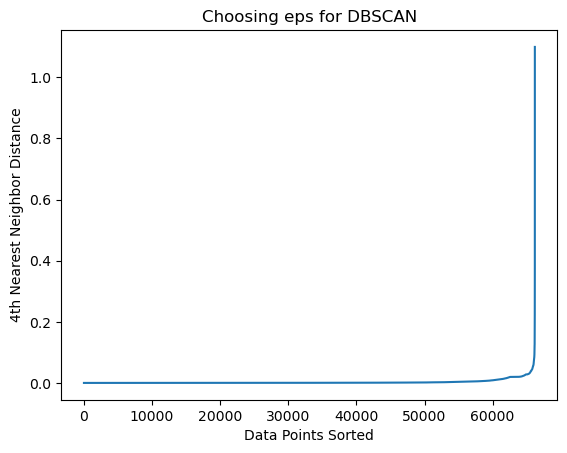

In [89]:
from sklearn.neighbors import NearestNeighbors

# Compute the distance to the 4th nearest neighbor (min_samples = 4)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort and plot
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("Choosing eps for DBSCAN")
plt.show()


#### *USING KNEELLOCATOR TO FIND BEST EPS VALUES*

In [168]:
# AUTOMATICALLY FINDS 'EPS'

# ! pip install kneed  
from kneed import KneeLocator

In [169]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, -1])

# Find the knee (elbow) point automatically
knee_locator = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
best_eps = distances[knee_locator.knee]

print(f"Optimal eps value: {best_eps:.4f}")


Optimal eps value: 0.0982


In [179]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.0982 * 1.20, min_samples=4, metric='euclidean') # ACCEPTING 20% EXTRA VALUE FOR EPS
db_labels = dbscan.fit_predict(X_scaled)

# Count clusters (-1 means noise)
unique_labels, counts = np.unique(db_labels, return_counts=True)
print(dict(zip(unique_labels, counts)))


{np.int64(-1): np.int64(30), np.int64(0): np.int64(10824), np.int64(1): np.int64(13490), np.int64(2): np.int64(15049), np.int64(3): np.int64(14526), np.int64(4): np.int64(1693), np.int64(5): np.int64(2400), np.int64(6): np.int64(4358), np.int64(7): np.int64(524), np.int64(8): np.int64(1548), np.int64(9): np.int64(138), np.int64(10): np.int64(400), np.int64(11): np.int64(151), np.int64(12): np.int64(10), np.int64(13): np.int64(129), np.int64(14): np.int64(54), np.int64(15): np.int64(109), np.int64(16): np.int64(169), np.int64(17): np.int64(107), np.int64(18): np.int64(154), np.int64(19): np.int64(45), np.int64(20): np.int64(160), np.int64(21): np.int64(60), np.int64(22): np.int64(12), np.int64(23): np.int64(9), np.int64(24): np.int64(47), np.int64(25): np.int64(4)}


C:\Users\SOURABH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SOURABH\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


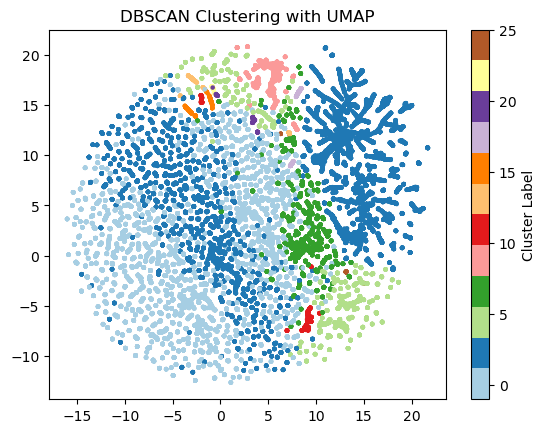

In [180]:
# UMAP for eps = eps*1.2

reducer = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X_scaled)

plt.scatter(embedding[:, 0], embedding[:, 1], c=db_labels, cmap='Paired', s=5)
plt.title("DBSCAN Clustering with UMAP when eps=0.0982 * 1.20")
plt.colorbar(label="Cluster Label")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.0982 * 1.30, min_samples=4, metric='euclidean') # ACCEPTING 30% EXTRA VALUE FOR EPS
db_labels = dbscan.fit_predict(X_scaled)

# Count clusters (-1 means noise)
unique_labels, counts = np.unique(db_labels, return_counts=True)
print(dict(zip(unique_labels, counts)))

C:\Users\SOURABH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SOURABH\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


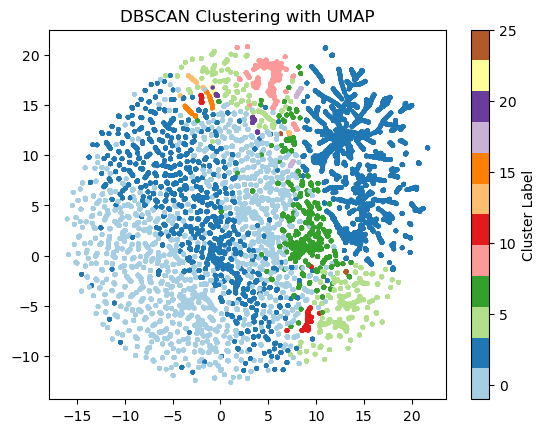

In [177]:
# UMAP for eps = eps*1.3
reducer = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X_scaled)

plt.scatter(embedding[:, 0], embedding[:, 1], c=db_labels, cmap='Paired', s=5)
plt.title("DBSCAN Clustering with UMAP when eps=0.0982 * 1.30")
plt.colorbar(label="Cluster Label")
plt.show()

In [99]:
X_scaled['cluster_dbscan'] = db_labels  # Adding cluster labels to the dataset

In [102]:
X_scaled.groupby('cluster_dbscan').mean()

,ctc,YOE,years_for_first_increment,avg_ctc,avg_position_ctc,ctc_level,avg_ctc_flag,avg_position_ctc_flag
cluster_dbscan,,,,,,,,
-1,0.244928,0.503771,0.481649,0.065194,0.213680,0.658120,0.5,0.397436
0,0.006558,0.152413,0.117044,0.023852,0.025610,0.666667,1.0,1.000000
1,0.001170,0.125560,0.089446,0.024285,0.025509,0.000000,1.0,1.000000
2,0.053175,0.162410,0.130248,0.020785,0.021444,1.000000,0.0,0.000000
3,0.003749,0.124059,0.091236,0.023474,0.024233,0.333333,1.0,1.000000
4,0.007268,0.122951,0.094669,0.018428,0.012381,0.666667,1.0,0.000000
5,0.012278,0.230809,0.192541,0.019192,0.031580,1.000000,0.0,1.000000
6,0.012266,0.205486,0.170271,0.038603,0.041048,1.000000,1.0,1.000000
7,0.007764,0.115776,0.081837,0.013704,0.012068,0.666667,0.0,0.000000


In [110]:
X_scaled = X_scaled.iloc[:,:-1]

In [174]:
# eps=0.0982 * 1.20

from sklearn.metrics import calinski_harabasz_score
vrc_score = calinski_harabasz_score(X_scaled, db_labels)
print(f"Calinski-Harabasz Score for eps = (0.0982 * 1.20) : {vrc_score}")

Calinski-Harabasz Score for eps = (0.0982 * 1.20) : 63356.750203202566


In [178]:
# eps=0.0982 * 1.30

from sklearn.metrics import calinski_harabasz_score
vrc_score = calinski_harabasz_score(X_scaled, db_labels)
print(f"Calinski-Harabasz Score for eps = (0.0982 * 1.30) : {vrc_score}")

Calinski-Harabasz Score for eps = (0.0982 * 1.20) : 63477.50413906769


#### NOTE: AS DBSCAN IS NOT PERFORMING WELL, THERE IS NO NEED TO USE DBSCAN. THEREFORE STICKING WITH PREVIOUS CLUSTERING METHODS.

### **INSIGHTS AND OBSERVATIONS**
- FOR SIMPLICITY 'K' HAS BEEN CHOSEN WITH THE HELP OF SILHOUETTE_SCORE AND DAVIES_BOULDIN TEST.
- CLUSTER 0 HAS THE HIGHER AVERAGE CTC WHILE CLUSTER 1 HAS THE LOWEST AVERAGE CTC
- BEING CLUSTER 3 THE HIGHEST AVERAGE OF YOE, YET IT HAS LOW AVERAGE CTC PROVING WRONG THAT CTC INCREASES WITH INCREASE IN YOE.
- CLUSTER 1 HAS THE HIGHEST COUNT AND CLUSTER 0 THE LEAST.

### **RECOMMENDATIONS**
- INSTITUTE HAS LOT OF JUNIOR AND MID-SENIOR ROLE(AS PER CTC) AND HENCE SHOULD DESIGN COURSES WHICH WOULD BENEFIT TO THEM.
- MAJORITY OF LEARNERS ARE OF LOW INCOME CATEGORY, SO THE COURSE SHOULD BE DESIGNED CONSIDERING THIS FACT.
- THERE ARE PLENTY OF DATA WHERE 'JOB POSITION' IS NOT AVAILABLE WHICH NEGATIVELY AFFECTED CLUSTERING, THEREFORE IT NEED TO BE FILLED FOR TRUE CLUSTERING.

In [ ]:
https://drive.google.com/file/d/1BSvSIxtazgCoPGVDPhyYjMCJ9JCFT14j/view?usp=sharing